In [134]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
plt.rc('font',family = 'Malgun Gothic')
matplotlib.rc("axes",unicode_minus = False) # 음수표시 

In [135]:
df = pd.read_csv("../data/01 Sales_Data.csv")

# 회원상태

In [136]:
df['회원상태'] = df['회원상태'].fillna("정상회원")

# 구매수량

## 소수점 날리기

In [137]:
df_point = df[df['구매수량'] != df['구매수량'].astype(int)]
df_point

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
558,1075791424,정상회원,0.3,5054,2021-07-03,2021-07-03,2021-07-03,0,0,NaN,오후 12:60,100022020V2_1513
716,585606976,정상회원,0.3,5743,2021-09-03,2021-09-03,2021-09-04,0,0,NaN,오후 12:60,100021148V2_863
880,230988480,정상회원,0.5,22111,2021-01-27,2021-01-27,2021-01-29,0,0,NaN,오후 12:59,100021000V2_761
999,999227712,정상회원,0.1,1685,2021-03-15,2021-03-16,2021-03-17,0,0,NaN,오후 12:59,100022020V2_1513
1390,643202368,정상회원,0.1,5839,2021-09-14,2021-09-14,2021-09-14,0,0,NaN,오후 12:59,10002884V2_673
...,...,...,...,...,...,...,...,...,...,...,...,...
666999,1670400000,탈퇴,0.5,23547,2021-04-17,2021-04-17,2021-04-18,0,0,NaN,오전 01:02,100021000V2_761
667273,239605888,정상회원,0.5,15315,2021-01-08,2021-01-09,2021-01-09,0,0,NaN,오전 01:01,10002209V2_164
667894,1290675392,정상회원,0.5,12157,2021-05-15,2021-05-15,2021-05-16,0,0,NaN,오전 01:00,1000243V2_31
667935,86983296,정상회원,0.1,5073,2021-06-20,2021-06-21,2021-06-21,0,0,NaN,오전 01:00,100022090V2_1564


In [138]:
df = df.drop(df_point.index, axis=0, inplace=False)

# 구매금액

# 총 구매금액값 < 사용적립금+네이버포인트  삭제

In [139]:
df

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,NaN,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
668106,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,NaN,오전 01:00,100022543V2_1912
668107,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,NaN,오전 01:00,10002432V2_327
668108,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,NaN,오전 01:00,100022317V2_1725
668109,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,NaN,오전 01:00,10002723V2_563


In [140]:
df_naverpoint = df.groupby(['회원번호', '주문일시', '주문시간'])['구매금액','사용 적립금','사용 포인트 네이버'].agg('sum').reset_index()

In [141]:
df_naverpoint

,회원번호,주문일시,주문시간,구매금액,사용 적립금,사용 포인트 네이버
0,18764160,2021-01-03,오후 08:01,12635,0,0
1,18764160,2021-01-23,오후 04:01,26418,0,0
2,18764160,2021-03-30,오후 03:25,29865,0,0
3,18764160,2021-04-11,오후 03:24,166554,0,0
4,18764160,2021-04-14,오후 08:38,9381,0,0
...,...,...,...,...,...,...
192962,1670620864,2021-04-27,오후 12:18,9955,0,0
192963,1670620864,2021-04-28,오후 08:26,56188,0,0
192964,1670620864,2021-04-30,오후 03:19,15124,0,0
192965,1670620864,2021-06-02,오후 03:53,9955,0,0


In [131]:
df_naverpoint.to_csv('../data/날짜별 구매금액.csv', index=False, encoding="utf-8-sig")

In [89]:
df_naverpoint = df_naverpoint.loc[df_naverpoint['구매금액']<(df_naverpoint['사용 적립금']) + (df_naverpoint['사용 포인트 네이버'])].reset_index()

In [90]:
df_naverpoint

,index,회원번호,주문일시,주문시간,구매금액,사용 적립금,사용 포인트 네이버
0,2175,45932288,2021-01-26,오전 02:20,9572,0,10623
1,2996,52886720,2021-05-24,오후 06:28,54945,0,55870
2,3411,53382272,2021-08-17,오후 02:50,9189,0,9230
3,5655,61867904,2021-07-16,오후 12:29,41926,0,86660
4,5889,62704960,2021-08-20,오후 03:41,4499,0,7386
...,...,...,...,...,...,...,...
296,186934,1544440704,2021-10-25,오전 03:10,19910,0,97760
297,189395,1566528960,2021-07-24,오전 09:46,13401,10780,2730
298,189683,1569678592,2021-08-07,오후 06:30,4212,0,10115
299,190798,1581170944,2021-04-27,오전 12:45,9572,0,20100


In [92]:
merge_columns = ['회원번호', '주문일시', '주문시간']
merged_df = pd.merge(df, df_naverpoint[merge_columns], on=merge_columns, how='left', indicator=True)
df_merge = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

In [93]:
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,NaN,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
663848,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,NaN,오전 01:00,100022543V2_1912
663849,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,NaN,오전 01:00,10002432V2_327
663850,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,NaN,오전 01:00,100022317V2_1725
663851,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,NaN,오전 01:00,10002723V2_563


In [94]:
df_merge = df_merge.loc[df_merge['구매금액']>(df_merge['사용 적립금']) + (df_merge['사용 포인트 네이버'])]

In [95]:
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,NaN,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
663848,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,NaN,오전 01:00,100022543V2_1912
663849,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,NaN,오전 01:00,10002432V2_327
663850,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,NaN,오전 01:00,100022317V2_1725
663851,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,NaN,오전 01:00,10002723V2_563


# 주문취소 결측치:0, 주문취소:1로 변경

In [96]:
df_merge['주문취소여부'] = df_merge['주문취소여부'].fillna(0)
df_merge.loc[df_merge["주문취소여부"]=="주문취소",'주문취소여부'] = 1
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,1,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,1,오후 12:60,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
663848,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,0,오전 01:00,100022543V2_1912
663849,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,0,오전 01:00,10002432V2_327
663850,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,0,오전 01:00,100022317V2_1725
663851,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,0,오전 01:00,10002723V2_563


In [97]:
df_merge[df_merge['주문시간'].str.contains("60")]['주문시간'].value_counts()

오후 01:60    1064
오후 02:60     861
오후 03:60     830
오후 12:60     809
오후 08:60     728
오후 11:60     636
오후 10:60     562
오후 07:60     549
오후 06:60     519
오후 09:60     471
오전 01:60     383
오후 05:60     374
오전 02:60     359
오전 12:60     346
오후 04:60     313
오전 08:60     301
오전 11:60     298
오전 03:60     225
오전 07:60     218
오전 10:60     216
오전 04:60     171
오전 06:60     159
오전 05:60     159
오전 09:60     142
Name: 주문시간, dtype: int64

In [98]:
df_merge = df_merge.replace({'주문시간': {'오후 01:60': '오후 02:00', '오후 02:60': '오후 03:00', '오후 03:60': '오후 04:00',
                            '오후 12:60': '오후 01:00','오후 08:60': '오후 09:00',
                            '오후 11:60': '오후 12:00','오후 10:60': '오후 11:00','오후 07:60': '오후 08:00',
                            '오후 06:60': '오후 07:00','오후 09:60': '오후 10:00','오전 01:60': '오전 02:00',
                            '오후 05:60': '오후 06:00','오전 02:60': '오전 03:00','오전 12:60': '오전 01:00',
                           '오후 04:60': '오후 05:00','오전 08:60': '오전 09:00','오전 11:60': '오전 12:00',
                           '오전 03:60': '오전 04:00','오전 07:60': '오전 08:00','오전 10:60': '오전 11:00',
                           '오전 04:60': '오전 05:00','오전 06:60': '오전 07:00','오전 05:60': '오전 06:00',
                           '오전 09:60': '오전 10:00'}})

# 오후: PM, 오전: AM으로 변경

In [99]:
df_merge['주문시간'] = df_merge['주문시간'].str.replace('오전', 'AM')
df_merge['주문시간'] = df_merge['주문시간'].str.replace('오후', 'PM')
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,1,PM 01:00,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,PM 01:00,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,100021452V2_1113
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,10002931V2_708
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,1,PM 01:00,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
663848,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,0,AM 01:00,100022543V2_1912
663849,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,0,AM 01:00,10002432V2_327
663850,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,0,AM 01:00,100022317V2_1725
663851,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,0,AM 01:00,10002723V2_563


# 주문일시와 주문시간을 의미있는 데이터로 생성

In [102]:
df_merge['주문일시'] = pd.to_datetime(df_merge['주문일시'])

In [103]:
df_merge['주문요일']=df_merge['주문일시'].dt.day_name()

In [104]:
df_merge["주문요일을숫자로"] = df_merge['주문일시'].dt.weekday

In [105]:
df_merge["주문월"] = df_merge["주문일시"].dt.month

In [106]:
df_merge["주문일"] = df_merge["주문일시"].dt.day

In [107]:
df_merge['주문시간'] = pd.to_datetime(df_merge['주문시간'], format='%p %I:%M')
df_merge["주문시"] = df_merge["주문시간"].dt.hour
df_merge['주문시간'] = df_merge['주문시간'].apply(lambda x: datetime.strftime(x, '%p %I:%M'))

In [108]:
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,주문요일,주문요일을숫자로,주문월,주문일,주문시
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,1,PM 01:00,100021783V2_1337,Saturday,5,1,2,13
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,PM 01:00,100022137V2_1606,Saturday,5,1,2,13
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,100021452V2_1113,Saturday,5,1,2,13
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,10002931V2_708,Saturday,5,1,2,13
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,1,PM 01:00,100022085V2_1559,Saturday,5,1,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663848,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,0,AM 01:00,100022543V2_1912,Tuesday,1,10,19,1
663849,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,0,AM 01:00,10002432V2_327,Saturday,5,10,23,1
663850,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,0,AM 01:00,100022317V2_1725,Saturday,5,10,23,1
663851,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,0,AM 01:00,10002723V2_563,Wednesday,2,10,27,1


# 주문취소 o, x 데이터 분리

In [113]:
df_merge_order = df_merge[df_merge['주문취소여부']==0]
df_merge_order

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,주문요일,주문요일을숫자로,주문월,주문일,주문시
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,PM 01:00,100022137V2_1606,Saturday,5,1,2,13
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,100021452V2_1113,Saturday,5,1,2,13
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,PM 01:00,10002931V2_708,Saturday,5,1,2,13
7,369152832,정상회원,1.0,2489,2021-01-02,2021-01-02,2021-01-02,0,0,0,PM 01:00,100022160V2_1623,Saturday,5,1,2,13
8,441813376,정상회원,2.0,19144,2021-01-03,2021-01-05,2021-01-05,0,0,0,PM 01:00,100021509V2_1149,Sunday,6,1,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663848,1523874368,정상회원,1.0,166554,2021-10-19,2021-10-20,2021-10-20,0,0,0,AM 01:00,100022543V2_1912,Tuesday,1,10,19,1
663849,402835520,정상회원,1.0,12635,2021-10-23,2021-10-23,2021-10-24,0,0,0,AM 01:00,10002432V2_327,Saturday,5,10,23,1
663850,402835520,정상회원,1.0,7849,2021-10-23,2021-10-23,2021-10-23,0,0,0,AM 01:00,100022317V2_1725,Saturday,5,10,23,1
663851,1544381312,정상회원,1.0,7275,2021-10-27,2021-10-27,2021-10-28,6270,0,0,AM 01:00,10002723V2_563,Wednesday,2,10,27,1


# 주문취소 x인 데이터 datetime형식으로 변경

In [117]:
df_merge_order['배송시작일'] = pd.to_datetime(df_merge_order['배송시작일'])
df_merge_order['배송완료일'] = pd.to_datetime(df_merge_order['배송완료일'])
df_merge_order["출고기간"] = df_merge_order["배송시작일"] - df_merge_order["주문일시"]
df_merge_order["배송소요기간"] = df_merge_order["배송완료일"] - df_merge_order["배송시작일"]
df_merge_order['출고기간'].value_counts()
# df_merge_order

0 days    494396
1 days    110580
2 days     26674
Name: 출고기간, dtype: int64

<AxesSubplot: >

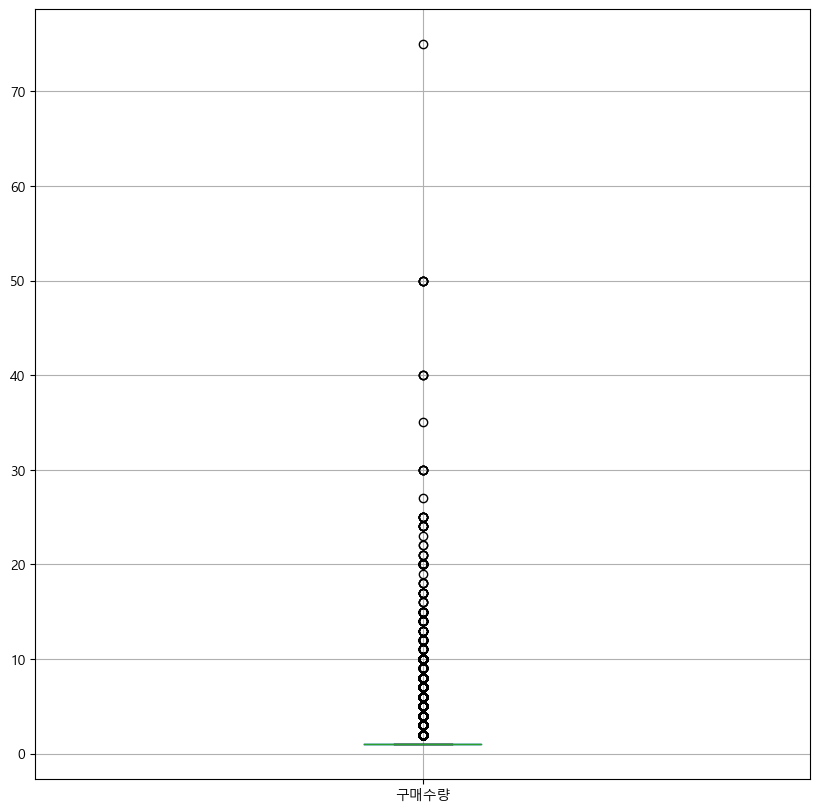

In [118]:
plt.figure(figsize=(10,10))
df_merge_order.boxplot(column = ['구매수량'])

- 구매수량높은 것은 김으로 충분히 가능성있음

<AxesSubplot: >

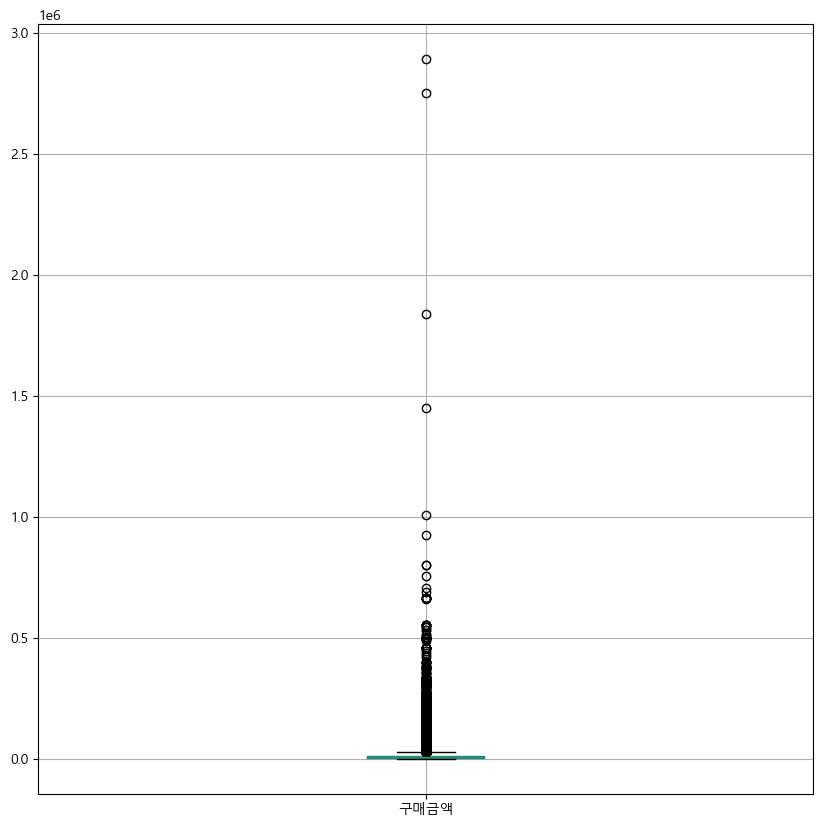

In [119]:
plt.figure(figsize=(10,10))
df_merge_order.boxplot(column = ['구매금액'])

- 구매금액> 100만원이상인 경우는 홍삼,선물세트 등 비싼 경우

<AxesSubplot: >

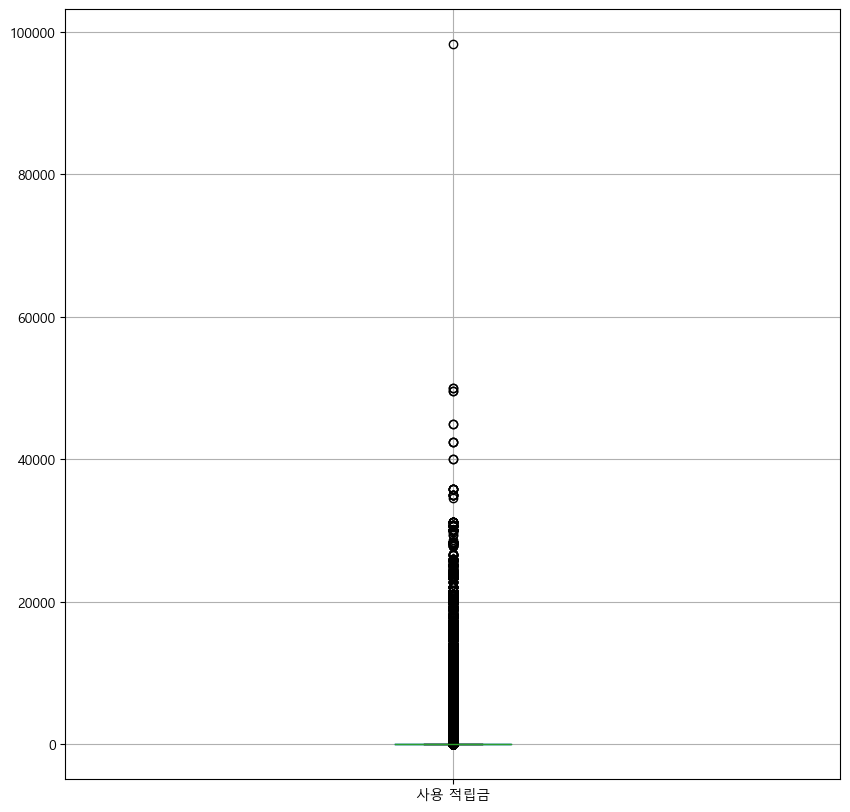

In [120]:
plt.figure(figsize=(10,10))
df_merge_order.boxplot(column = ['사용 적립금'])

- 사용 적립금에 대한 이상치를 이미 처리함

<AxesSubplot: >

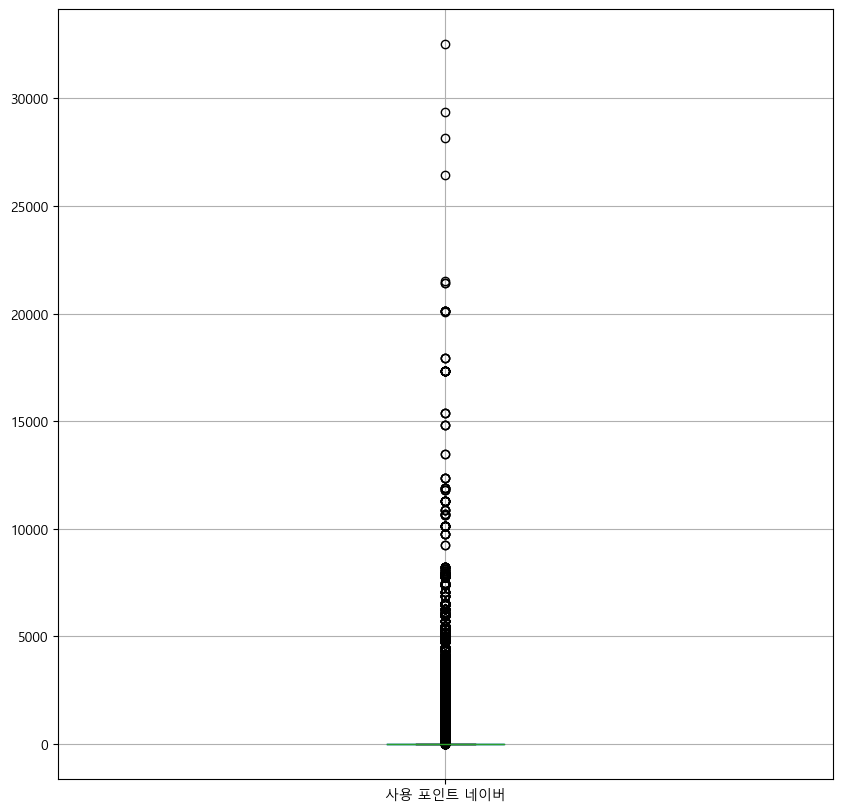

In [121]:
plt.figure(figsize=(10,10))
df_merge_order.boxplot(column = ['사용 포인트 네이버'])

- 네이버 포인트에 대한 이상치를 이미 처리함

<AxesSubplot: >

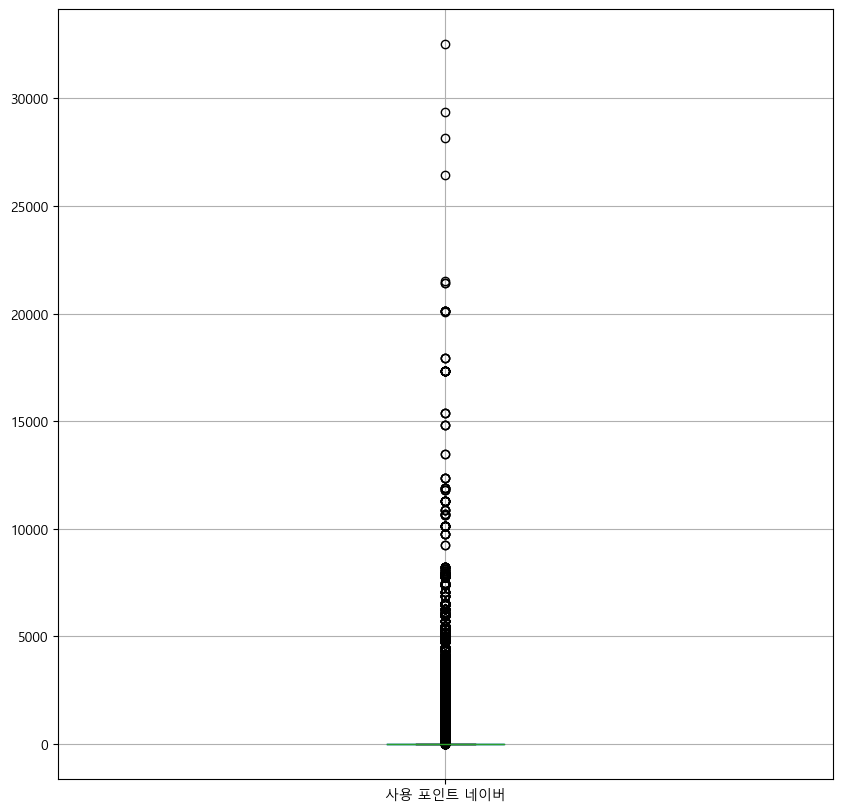

In [122]:
plt.figure(figsize=(10,10))
df_merge_order.boxplot(column = ['사용 포인트 네이버'])

In [130]:
df_merge_order.to_csv('../data/actual_purchase.csv', index=False, encoding="utf-8-sig")